In [297]:
# Cellule d'import des librairies 
import os 
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
from pathlib import Path
from random import sample 

np.random.seed(0)

In [298]:
# Folder names 
modelFolder = Path("D:\\Master Thesis\\temp\\temp20230714\\all models results")
# Ground Truth 
GTfolder = Path("./data/test/masks/") 

In [299]:
# Cellule d'import des fichiers 


# Resultats 
modelNames = [
    "celestial-bird-58", 
    "cool-lion-105", 
    "lilac-wildflower-117"
]
# modelNames = [
#     "cool-lion-105", 
#     "earthy-frost-106", 
#     "sparkling-energy-107", 
#     "pretty-violet-108", 
#     "upbeat-sponge-109", 
#     "solar-snowball-110"
# ]
# modelNames = [
#     "lilac-wildflower-117", 
#     "glorious-firefly-118", 
#     "twilight-cloud-119", 
#     "clean-donkey-121", 
#     "upbeat-breeze-123", 
#     "drawn-thunder-124"
# ]
# modelNames = [
#     "vibrant-mountain-111", 
#     "devoted-pyramid-112", 
#     "dashing-silence-113", 
#     "soft-deluge-114", 
#     "golden-dragon-115", 
#     "frosty-dream-116"
# ]
nbOfModels = len(modelNames)
allFiles = []
for modelName in modelNames: 
    allFiles.append([f for f in (modelFolder/modelName).iterdir() if f.is_file()])
# print(allFiles)

# GT we keep 
allFilenames = [[f.stem for f in allFiles[i]] for i in range(nbOfModels)]
# print(len(allFilenames))

allGT = []
for f in GTfolder.iterdir(): 
    if f.is_file(): 
        i = 0 
        while i < nbOfModels and f.stem in allFilenames[i]: 
            i += 1 
        if i >= nbOfModels: 
            allGT.append(f)
nGT = len(allGT)

nlimit = 6
if nGT > nlimit: 
    allGT = sample(allGT,6)
nGT = len(allGT)
# print(nGT)

In [300]:
# Create lists of images 
allModelResults = []
for i in range(nbOfModels): 
    allModelResults.append([cv.imread(str(img), cv.IMREAD_GRAYSCALE) for img in allFiles[i]])

allGTarrays = [cv.imread(str(img)) for img in allGT]

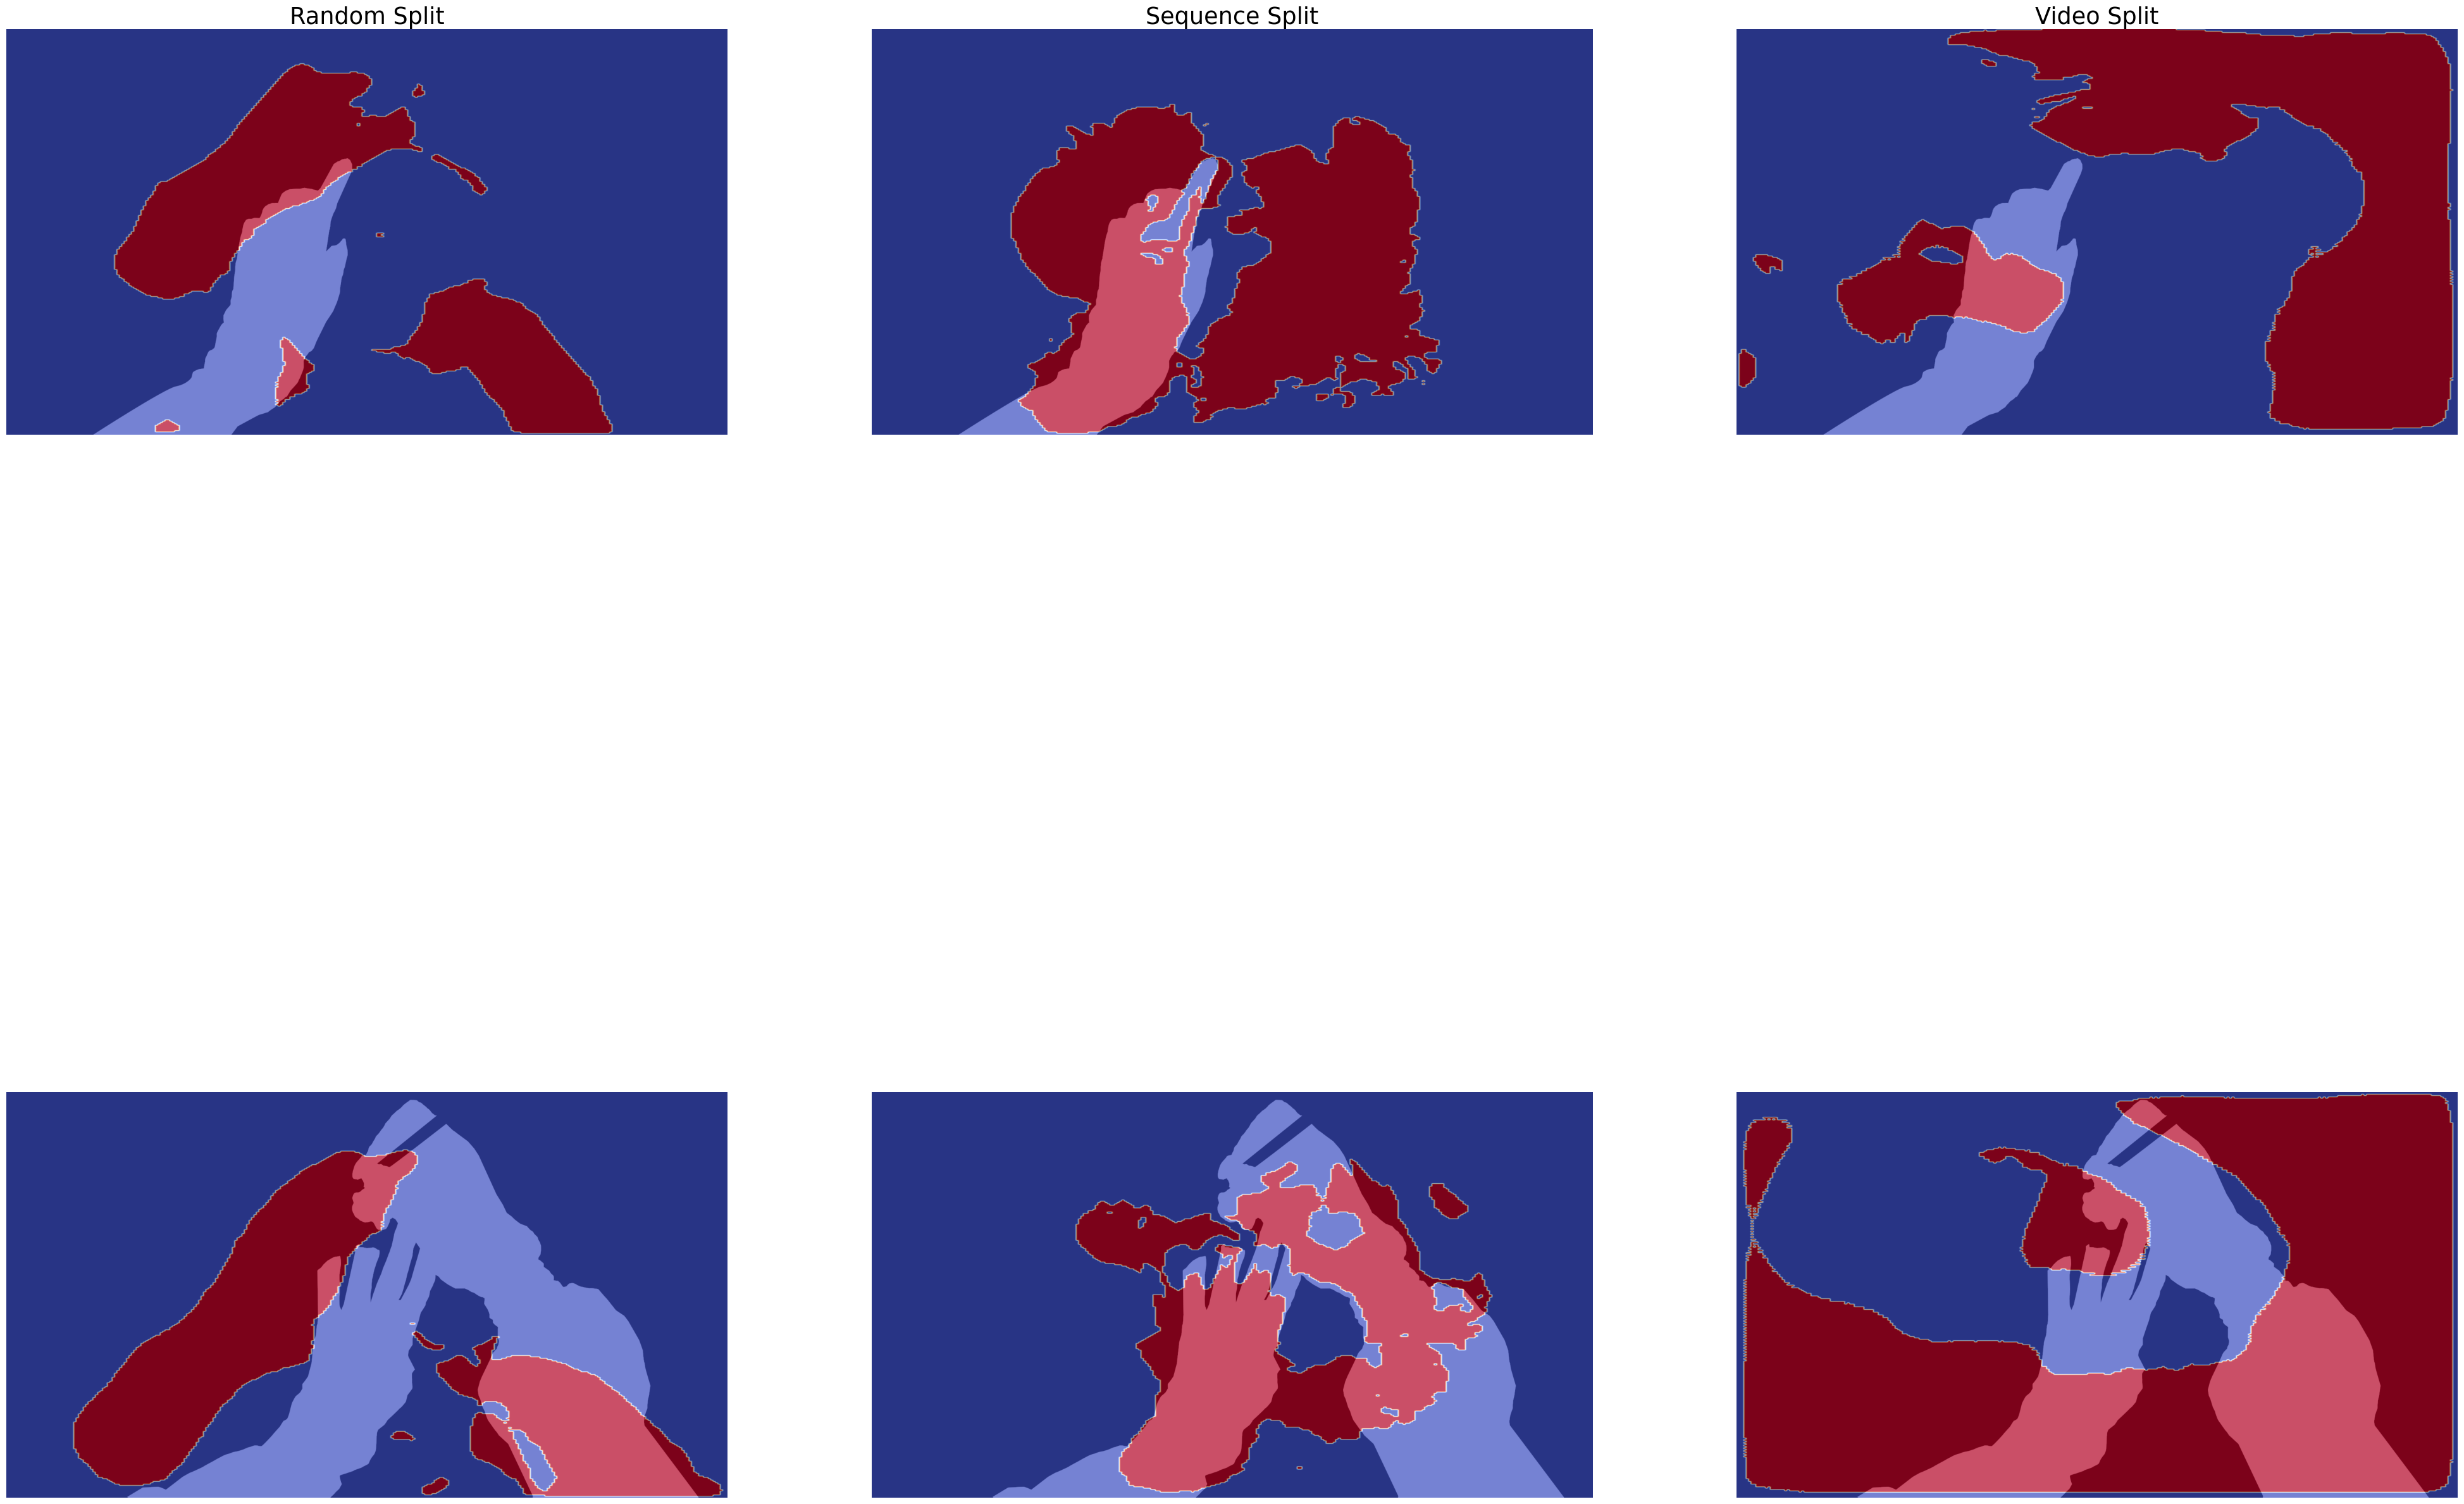

In [301]:
n = nGT
nbFolder = nbOfModels
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(nrows=n, ncols=nbOfModels, figsize=(50,40))
# fig.suptitle(t="Segmentation results")

for i in range(n): 
    for j in range(nbOfModels): 
        axs[i][j].imshow(allGTarrays[i])
        axs[i][j].imshow(allModelResults[j][i], alpha = 0.7, cmap='coolwarm')
        axs[i][j].axis('off')

# Put Title to columns 
coltitles = ["Random Split", "Sequence Split", "Video Split"]
# coltitles = ["RGB", "OF", "RGB+OF", "RGB+pos", "OF+pos", "RGB+OF+pos"]
# coltitles = modelNames 
for ax, col in zip(axs[0], coltitles):
    ax.set_title(col)
plt.show()